<a href="https://colab.research.google.com/github/Khushibung05/SVM/blob/main/SVM_loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A fintech company provides instant personal loans through a mobile application.

To reduce risk, the company wants an AI-based decision system that predicts whether a loan should be Approved or Rejected.
Challenges:
Customer data is not linearly separable
Simple linear rules fail
Decision boundaries may be curved or complex
The solution must be interactive and deployable
You are hired as a Machine Learning Engineer to build and deploy this system.

Load the dataset and study applicant attributes such as:
Applicant income
Loan amount
Credit history
Employment status
Identify features that may influence loan approval.


In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt


from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

# Path to the dataset (update if needed)
path = '/content/drive/My Drive/Colab Notebooks/Loan_prediction/loan.csv'

# Importing the dataset
df= pd.read_csv(path)
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Ar

In [31]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         6

In [32]:
df.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [33]:

# handle missing values for simplicity
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)
#Handle categorical missing values (Mode Imputation)
cat_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Education', 'Property_Area']

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)
#Handle Credit History (Very Important Feature)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)


/tmp/ipython-input-2314272039.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-2314272039.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [34]:
# Numerical columns for outlier removal
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


In [35]:
#Encode categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoders = {}

for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [36]:
#Define features and target
# Features and target
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

In [37]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [38]:
#Feature scaling (VERY IMPORTANT for SVM)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

since Customer data is not linearly separable
Simple linear rules fail
Decision boundaries may be curved or complex
The solution must be interactive and deployable


In [39]:
#train svm with RBF kernel
from sklearn.svm import SVC
svm_rbf=SVC(kernel='rbf',C=1,gamma='scale')
svm_rbf.fit(X_train,y_train)
y_pred_rbf=svm_rbf.predict(X_test)

In [40]:
#Model evaluation
accuracy=accuracy_score(y_test,y_pred_rbf)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.81


[[17 17]
 [ 3 67]]


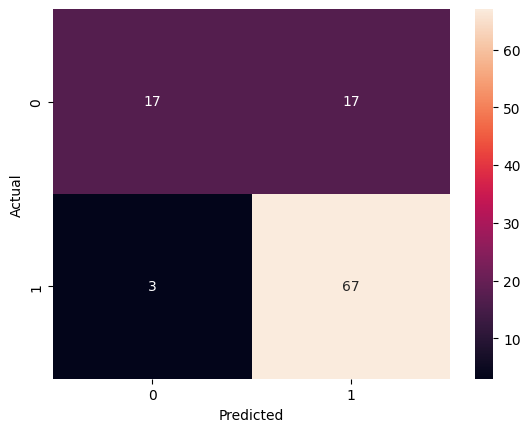

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rbf)
print(cm)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [41]:
#plotting(visualisation)
